**Workshop 3, Enrique Santos Fraire, 15/08/2022**

Variable of study

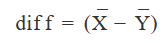

One-sample t-test

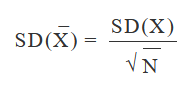

Two-sample t-test assuming that the population variances of both groups are NOT EQUAL, and the sample size of both groups is the same (N).

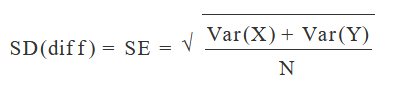

t-statistic for the two-sample t-test is calculated as:

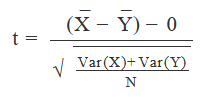

t is the # of standard deviations of the variable of study (in this case, the difference of the 2 means) that the empirical difference we got from the data is away from the hypothetical value, zero.

The rule of thumb we have used is that if |t| > 2 we have have statistical evidence at least at the 95% confidence level to reject the null hypothesis (or to support our alternative hypothesis).

The pvalue of the test is actually the exact probability of making a Type I Error (opposite of confidence level) after we calculate the exact t-statistic. In other words, the pvalue is the probability that we will be wrong if we reject the null hypothesis (and support our hypothesis).

For each value of a t-statistic, there is a corresponding pvalue. 

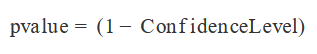

# 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

# Upgrade libraries
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
INTEL = pdr.get_data_yahoo('INTC', start="01/01/2017", end="08/15/2022", interval="m")
INTEL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,38.450001,36.189999,36.610001,36.820000,456335100.0,31.593971
2017-02-01,36.950001,34.840000,36.820000,36.200001,477551300.0,31.061968
2017-03-01,36.299999,34.660000,35.849998,36.070000,546151800.0,31.171368
2017-04-01,37.500000,35.209999,36.189999,36.150002,444122200.0,31.240507
2017-05-01,37.169998,35.020000,36.110001,36.110001,432927300.0,31.205940
...,...,...,...,...,...,...
2022-04-01,49.900002,43.500000,49.830002,43.590000,639472500.0,42.815891
2022-05-01,46.639999,40.310001,43.720001,44.419998,773236800.0,43.631153
2022-06-01,44.930000,36.599998,44.770000,37.410000,783353000.0,37.036106


In [39]:
AMD = pdr.get_data_yahoo('AMD', start="01/01/2017", end="08/15/2022", interval="m")
AMD

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,11.690000,9.420000,11.420000,10.370000,878890400,10.370000
2017-02-01,15.550000,10.810000,10.900000,14.460000,1571999700,14.460000
2017-03-01,15.090000,12.380000,15.080000,14.550000,1733593200,14.550000
2017-04-01,14.740000,12.220000,14.600000,13.300000,943383500,13.300000
2017-05-01,13.630000,9.850000,13.430000,11.190000,1716437000,11.190000
...,...,...,...,...,...,...
2022-04-01,111.419998,84.019997,110.480003,85.519997,1719017900,85.519997
2022-05-01,104.550003,83.269997,85.660004,101.860001,2898334400,101.860001
2022-06-01,109.570000,75.480003,102.129997,76.470001,2030987200,76.470001


In [40]:
import matplotlib
import matplotlib.pyplot as plt
import math

CALCULO DE CC RETURNS

In [41]:
INTEL['r'] = np.log(INTEL['Adj Close']) - np.log(INTEL['Adj Close'].shift(1))
INTEL['r']

Date
2017-01-01         NaN
2017-02-01   -0.016982
2017-03-01    0.003516
2017-04-01    0.002216
2017-05-01   -0.001107
                ...   
2022-04-01   -0.128356
2022-05-01    0.018862
2022-06-01   -0.163878
2022-07-01   -0.029845
2022-08-01   -0.128860
Name: r, Length: 68, dtype: float64

In [42]:
AMD['r'] = np.log(AMD['Adj Close']) - np.log(AMD['Adj Close'].shift(1))
AMD['r']

Date
2017-01-01         NaN
2017-02-01    0.332469
2017-03-01    0.006205
2017-04-01   -0.089827
2017-05-01   -0.172744
                ...   
2022-04-01   -0.245712
2022-05-01    0.174849
2022-06-01   -0.286701
2022-07-01    0.211384
2022-08-01   -0.107162
Name: r, Length: 68, dtype: float64

In [43]:
INTEL = INTEL.dropna()
AMD = AMD.dropna()

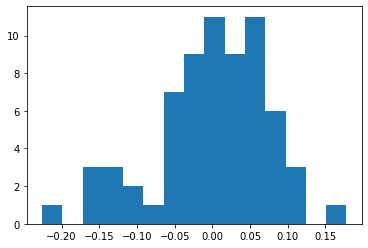

In [44]:
plt.hist(INTEL['r'], bins=15)
plt.show()

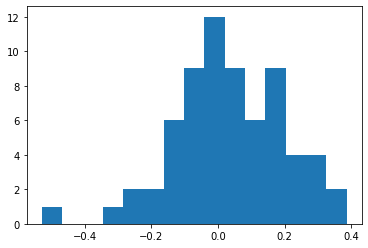

In [45]:
plt.hist(AMD['r'], bins=15)
plt.show()

*HIPÓTESIS*

H0: (mean(rAMD) - mean(rINTEL)) = 0

Ha: (mean(rAMD) - mean(rINTEL)) <> 0

In [46]:
AMD_mean = AMD["r"].mean()
AMD_mean

0.03137617455430063

In [47]:
AMD_var = AMD["r"].var()
AMD_var

0.026540656692007288

In [48]:
INTEL_mean = INTEL["r"].mean()
INTEL_mean

3.308305451637823e-06

In [49]:
INTEL_var = INTEL["r"].var()
INTEL_var

0.005888770498297462

In [50]:
t_value = (AMD_mean - INTEL_mean - 0) / math.sqrt((INTEL_var + AMD_var) / INTEL["r"].count())
t_value

1.426007995238894

In [51]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:

N = INTEL["r"].count()
df = ( ((N-1) / N**2) * (AMD_var + INTEL_var)**2  / ( (AMD_var/N)**2 + (INTEL_var/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t_value), df)
pvalue

0.15718168867129126

In [52]:
# Using the ttest_ind function from stats:
st.ttest_ind(AMD["r"],INTEL["r"],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.426007995238894, pvalue=0.15718168867129126)

In [54]:
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
# Using the ttest function from researchpy:
rp.ttest(AMD["r"],INTEL["r"],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0         r   67.0  0.031376  0.162913  0.019903  -0.008361  0.071114
 1         r   67.0  0.000003  0.076738  0.009375  -0.018715  0.018721
 2  combined  134.0  0.015690  0.127831  0.011043  -0.006153  0.037532,
               Welch's t-test  results
 0      Difference (r - r) =    0.0314
 1      Degrees of freedom =   94.7595
 2                       t =    1.4260
 3   Two side test p value =    0.1572
 4  Difference < 0 p value =    0.9214
 5  Difference > 0 p value =    0.0786
 6               Cohen's d =    0.2464
 7               Hedge's g =    0.2450
 8           Glass's delta =    0.1926
 9             Pearson's r =    0.1449)

# 4 Measures of linear relationship

La covarianza entre X y Y es
Average of product deviations from the mean of each variable.

Cov(x,y) = 1/N [(x1 - x mean) (y1 - y mean) + ... + (xn - x mean) (yn - ymean)]

Var(x) = Cov(x,x) = 1/N [(x1 - x mean) (x1 - x mean)] o (x1 - x mean)^2

If cov(x,y) > 0, then, on average, x is positively related to y.

If cov(x,y) < 0, then, on average, x is negatively related to y.

If cov(x,y) = -32
We can't understand the magnitude of cov, only its sign (+, -, 0)

We solve this problem of interpretation with the measure of correlation.

Corr(x,y) = cov(x,y) / [SD(x) * SD(y)]

-1 <= corr(x,y) <= 1

If corr(x,y) = +0.30 then, about 30% of the cases, when x increases, y increases. And when x decreases, y decreases.

If corr(x,y) = -0.30 then, about 30% of the cases, when x increases, y decreases. And when x decreases, y increases.

SD(corr(x,y)) = ? = std error of

t =  corr(x,y) / SD

In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

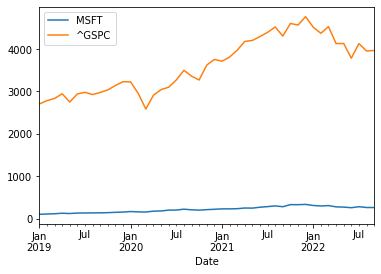

In [3]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [4]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

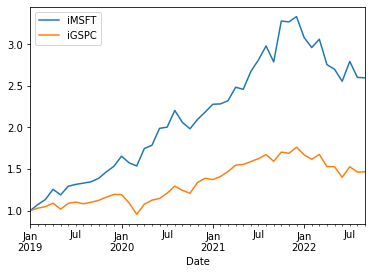

In [5]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [6]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [7]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 432x288 with 0 Axes>

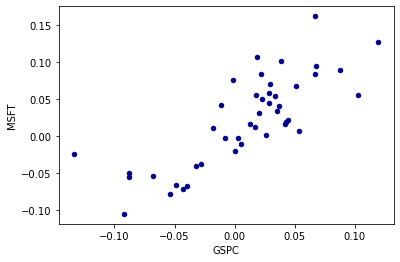

In [8]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

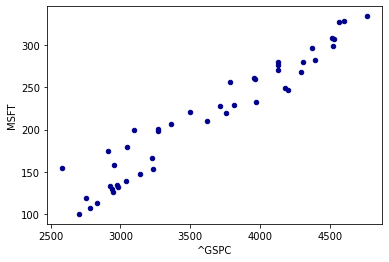

In [9]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

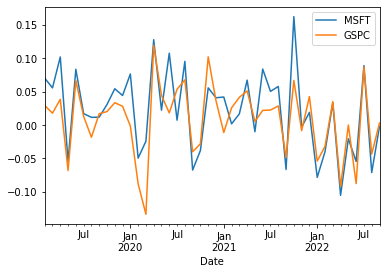

In [10]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

# 4.3 Calculating covariance and correlation

In [11]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002570329781825112

In [12]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00368385, 0.00257033],
       [0.00257033, 0.00283242]])

In [13]:
cov = covm[0,1]
cov

0.0025703297818251126

In [14]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79571875],
       [0.79571875, 1.        ]])

In [15]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7957187494497355

In [16]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7957187494497355, 1.0844874428678916e-10)